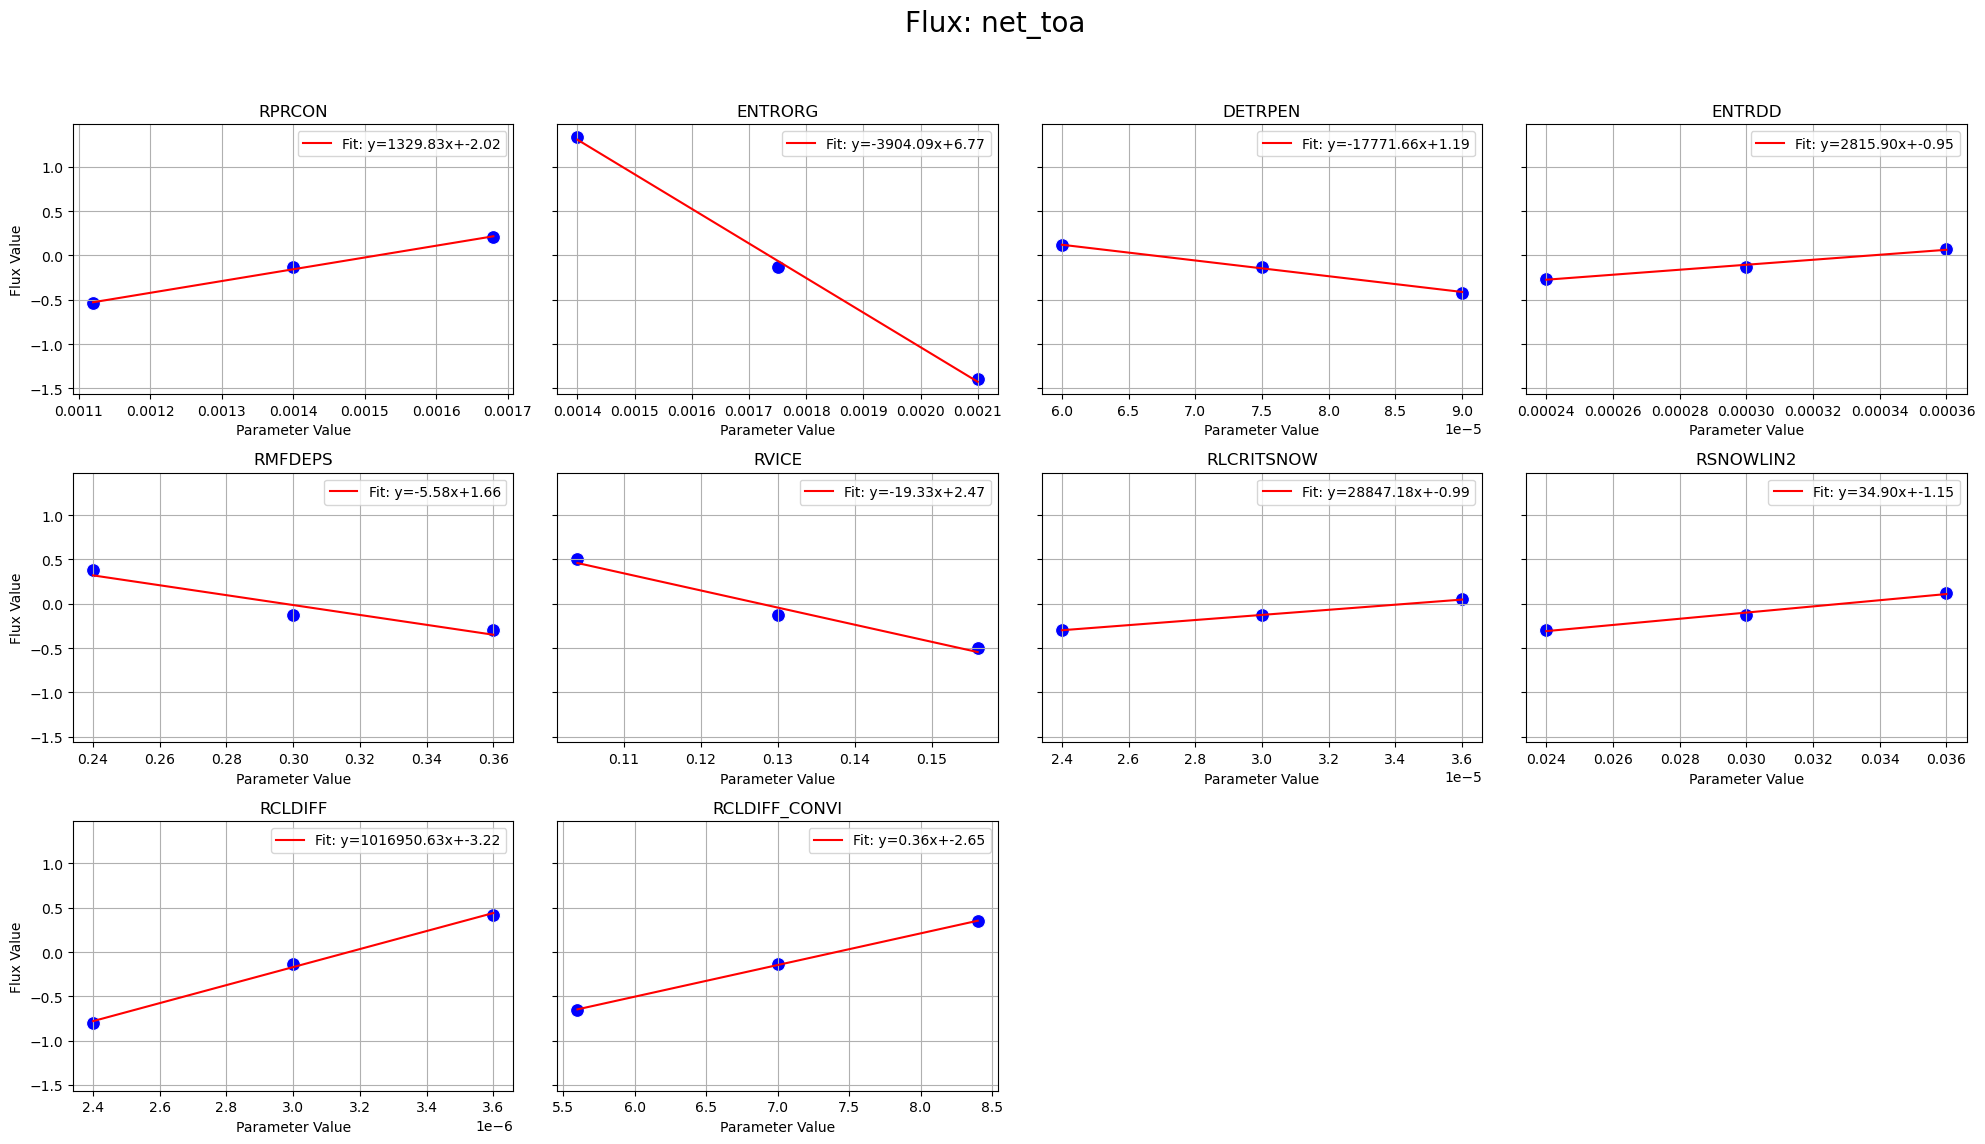

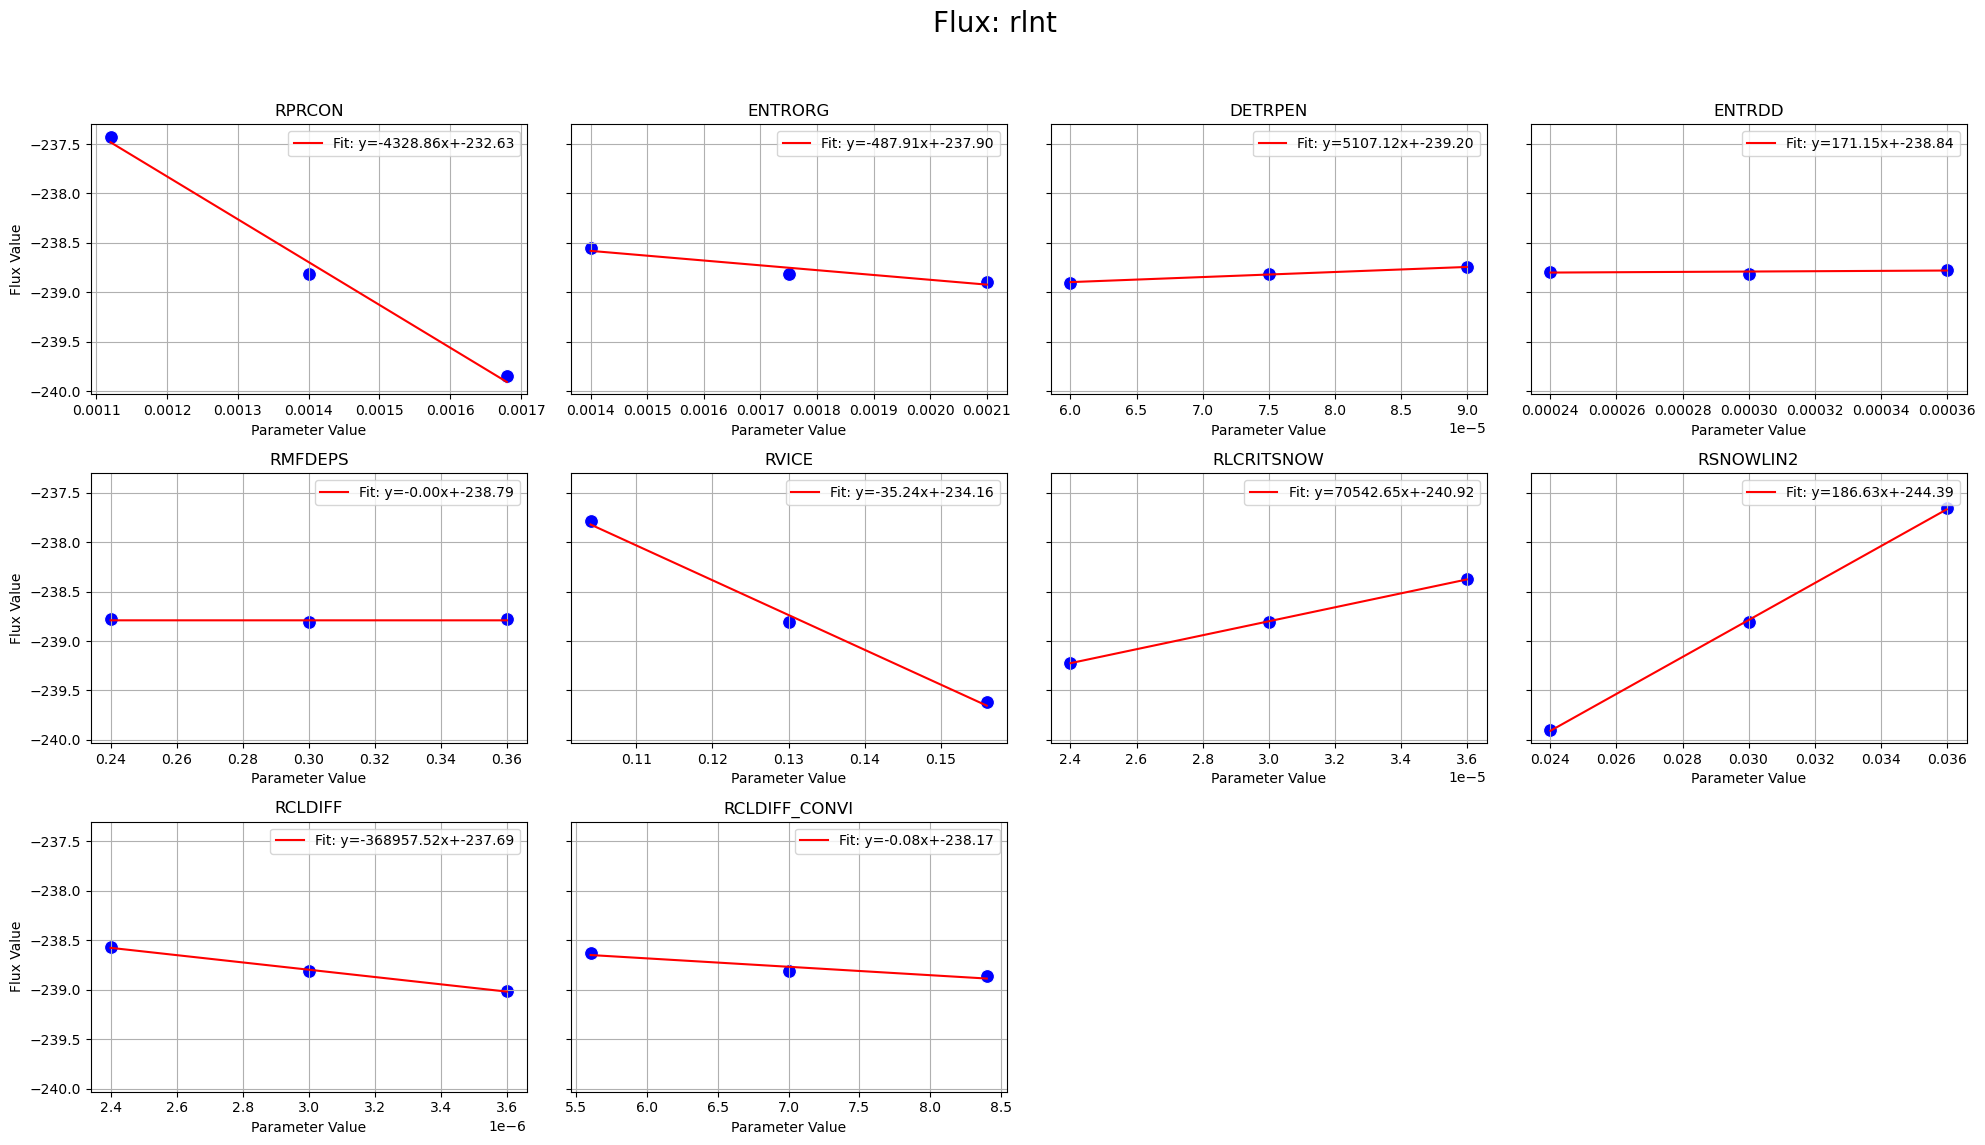

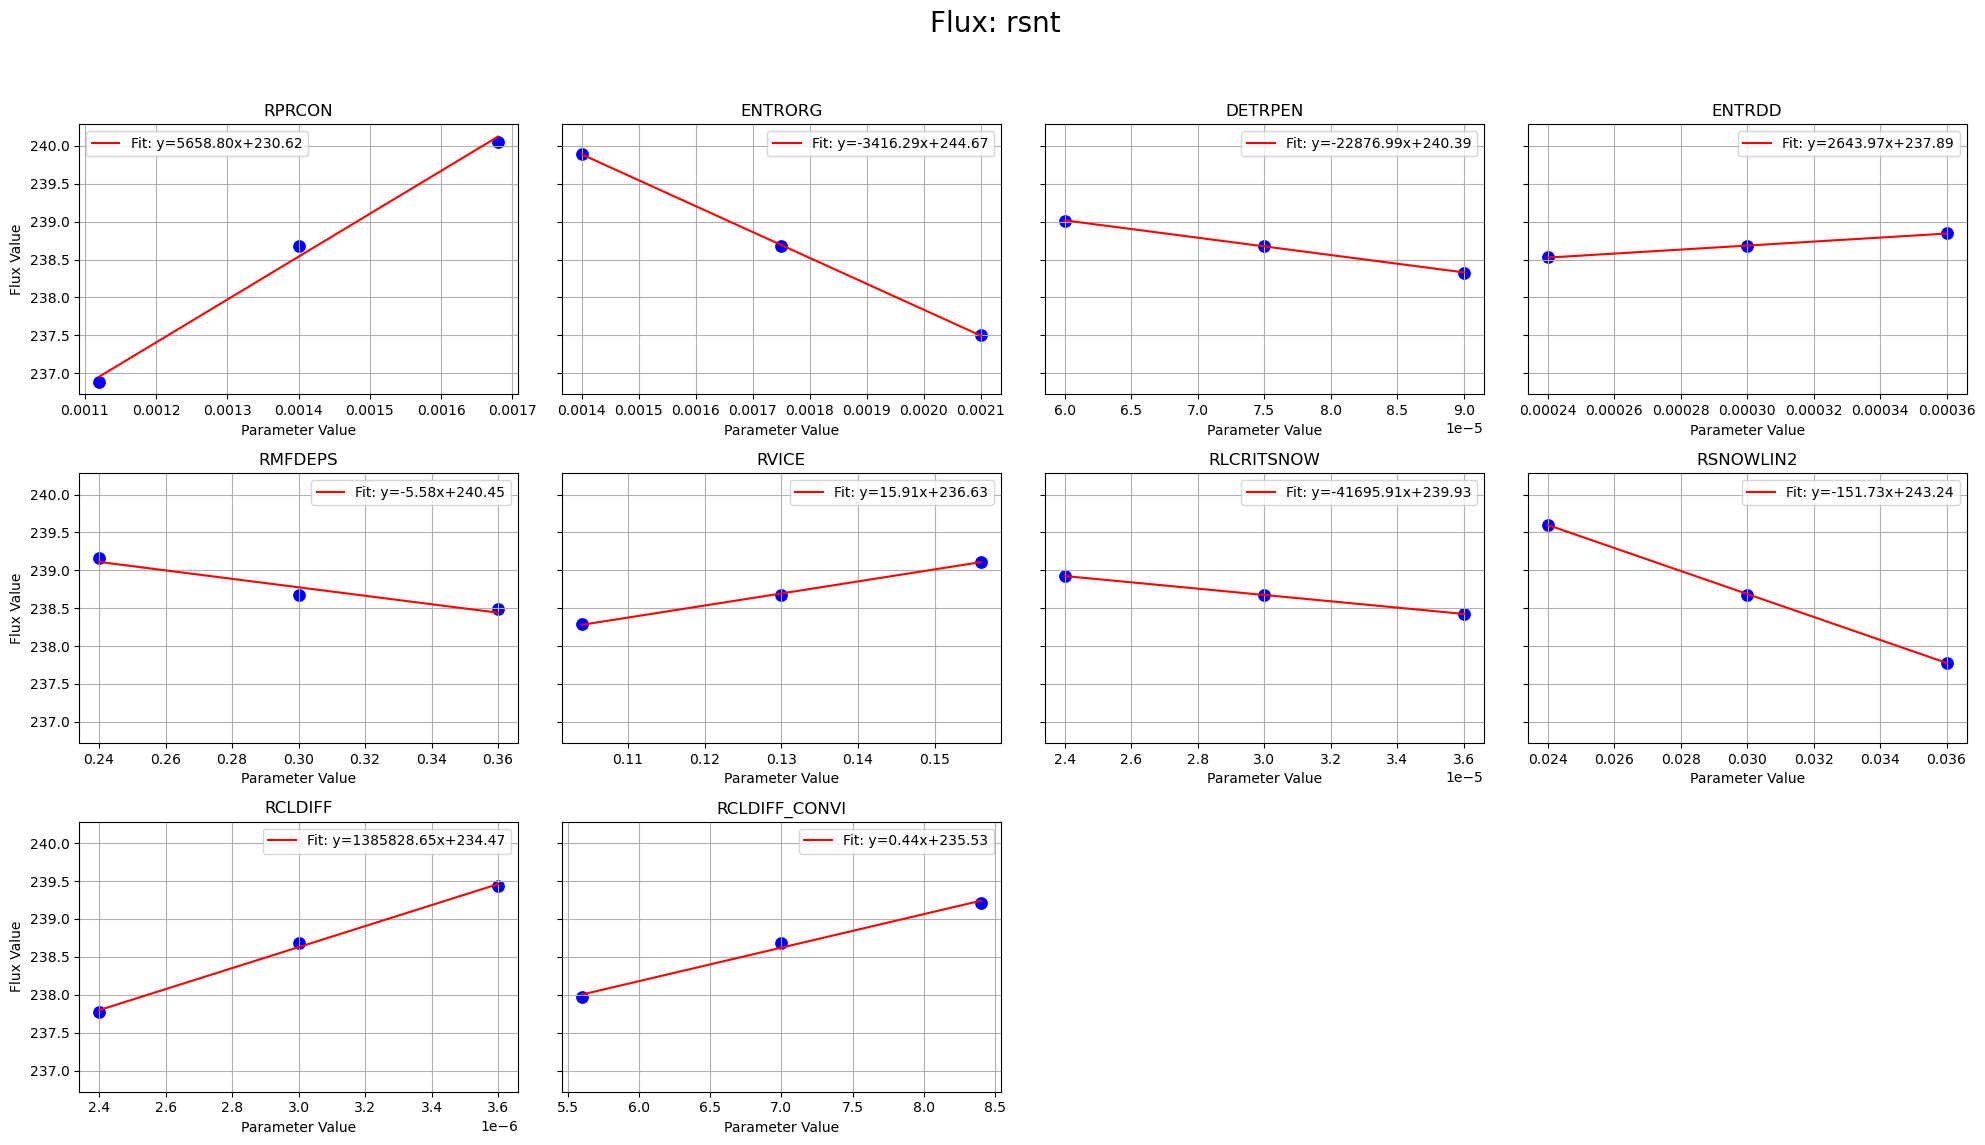

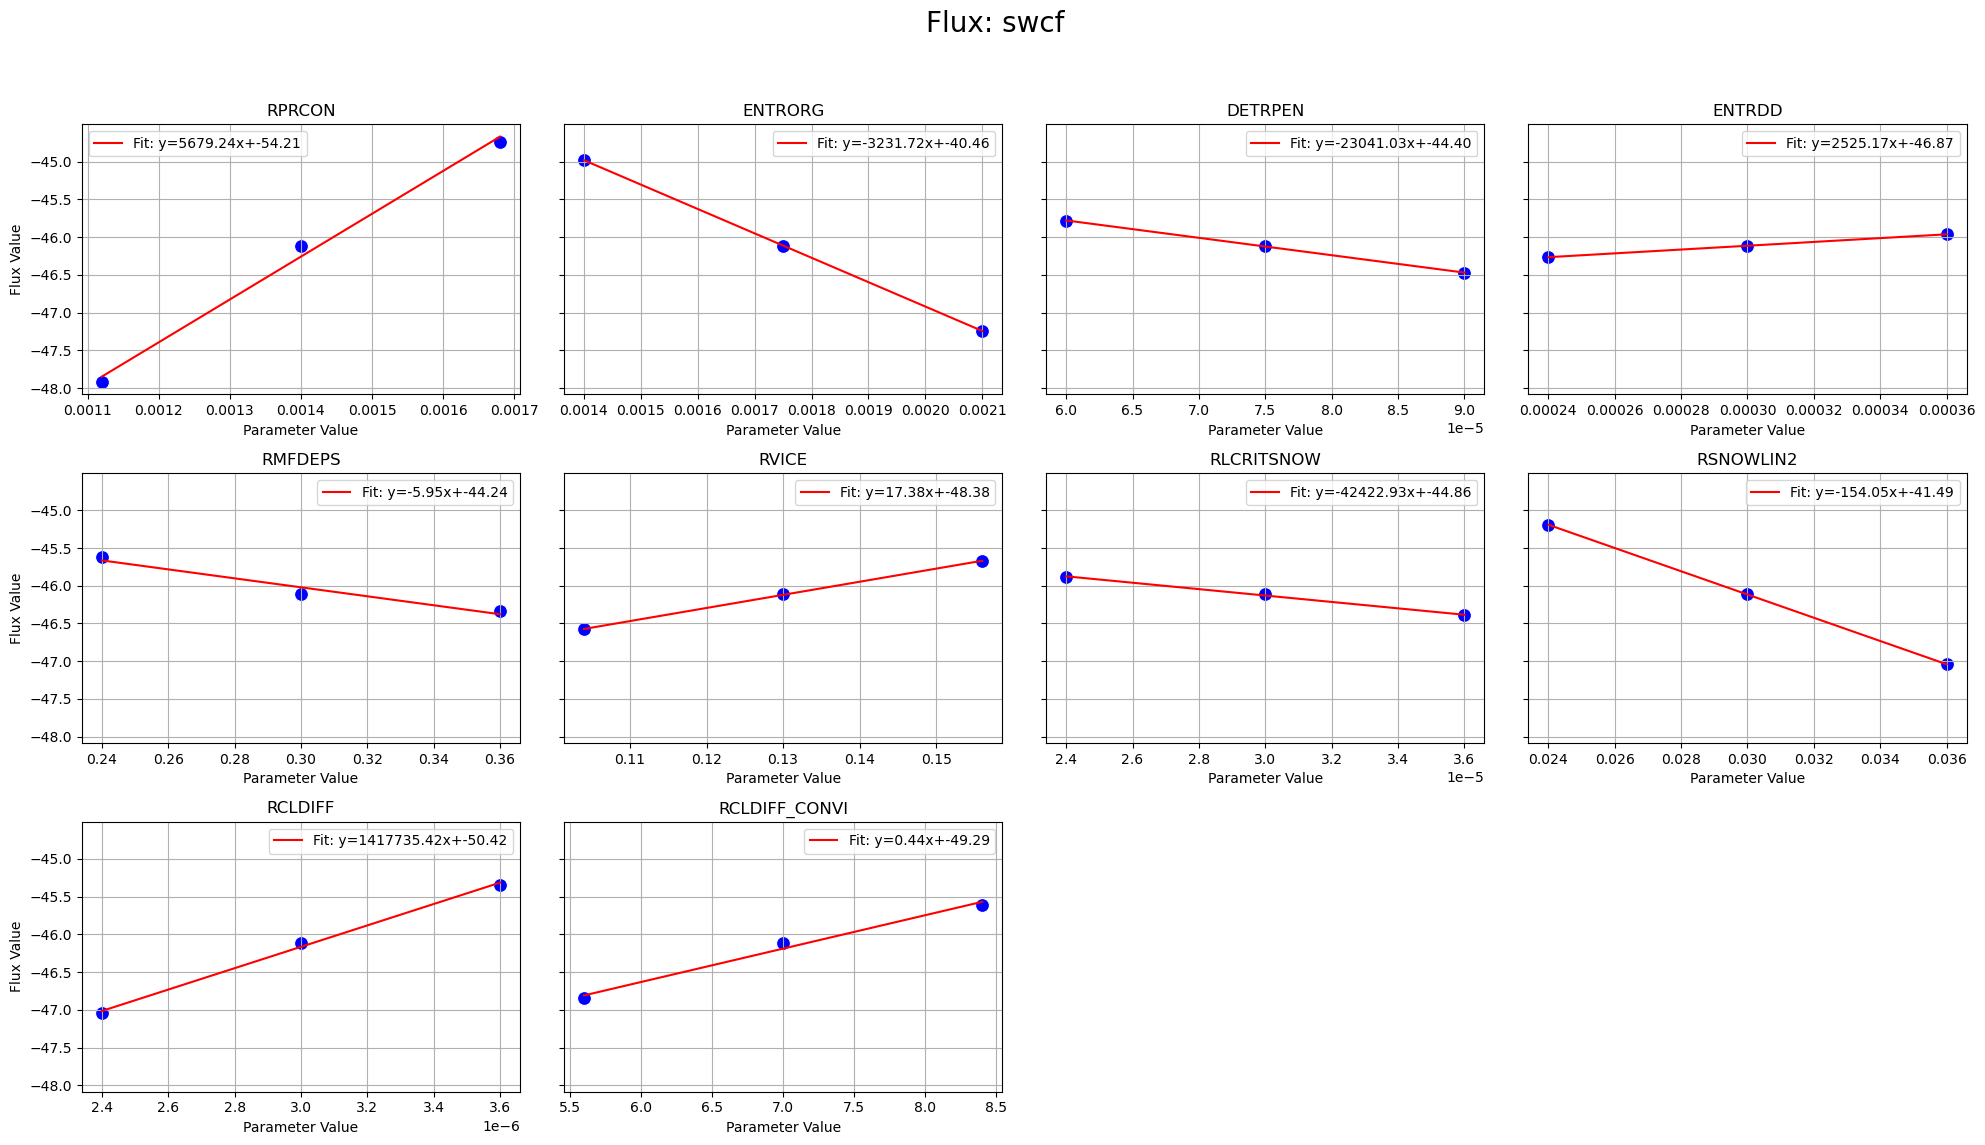

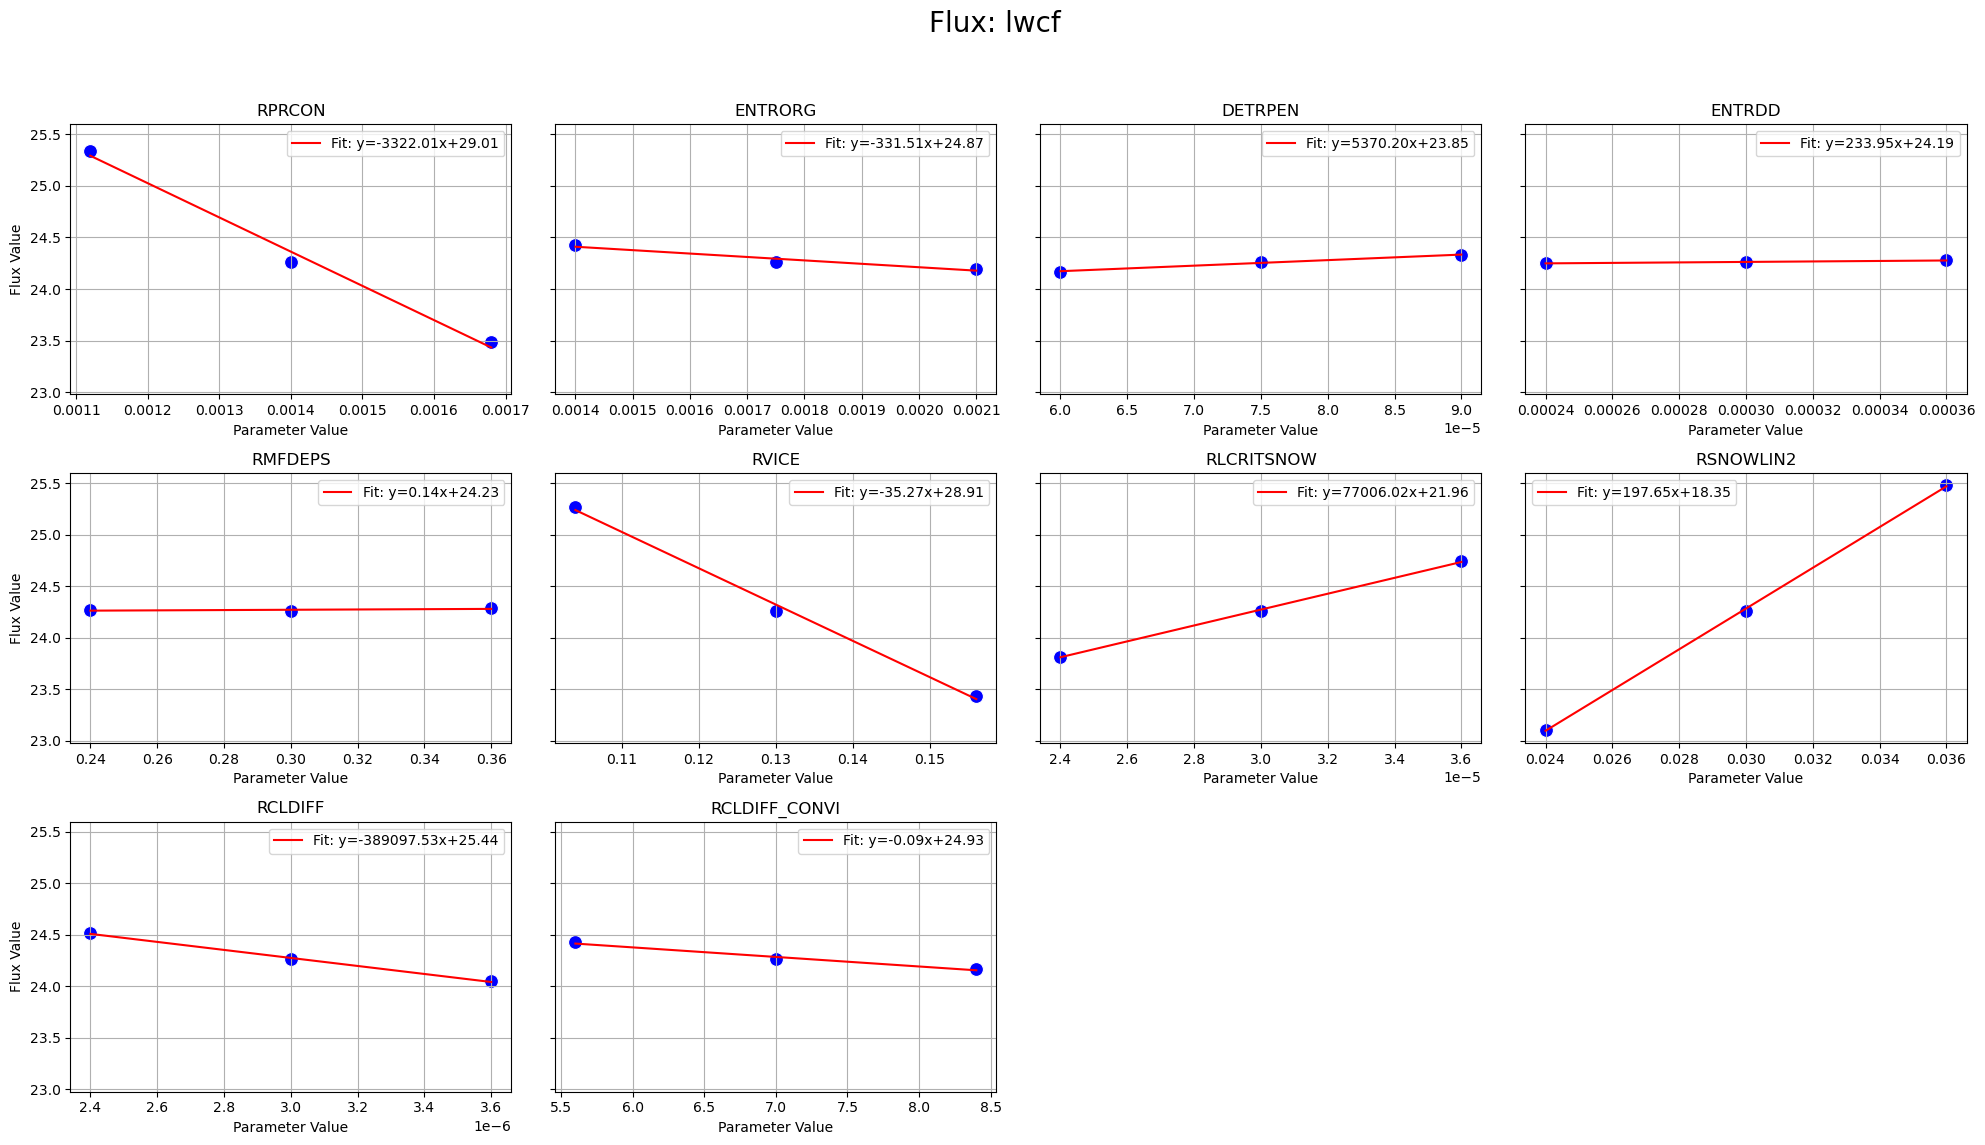

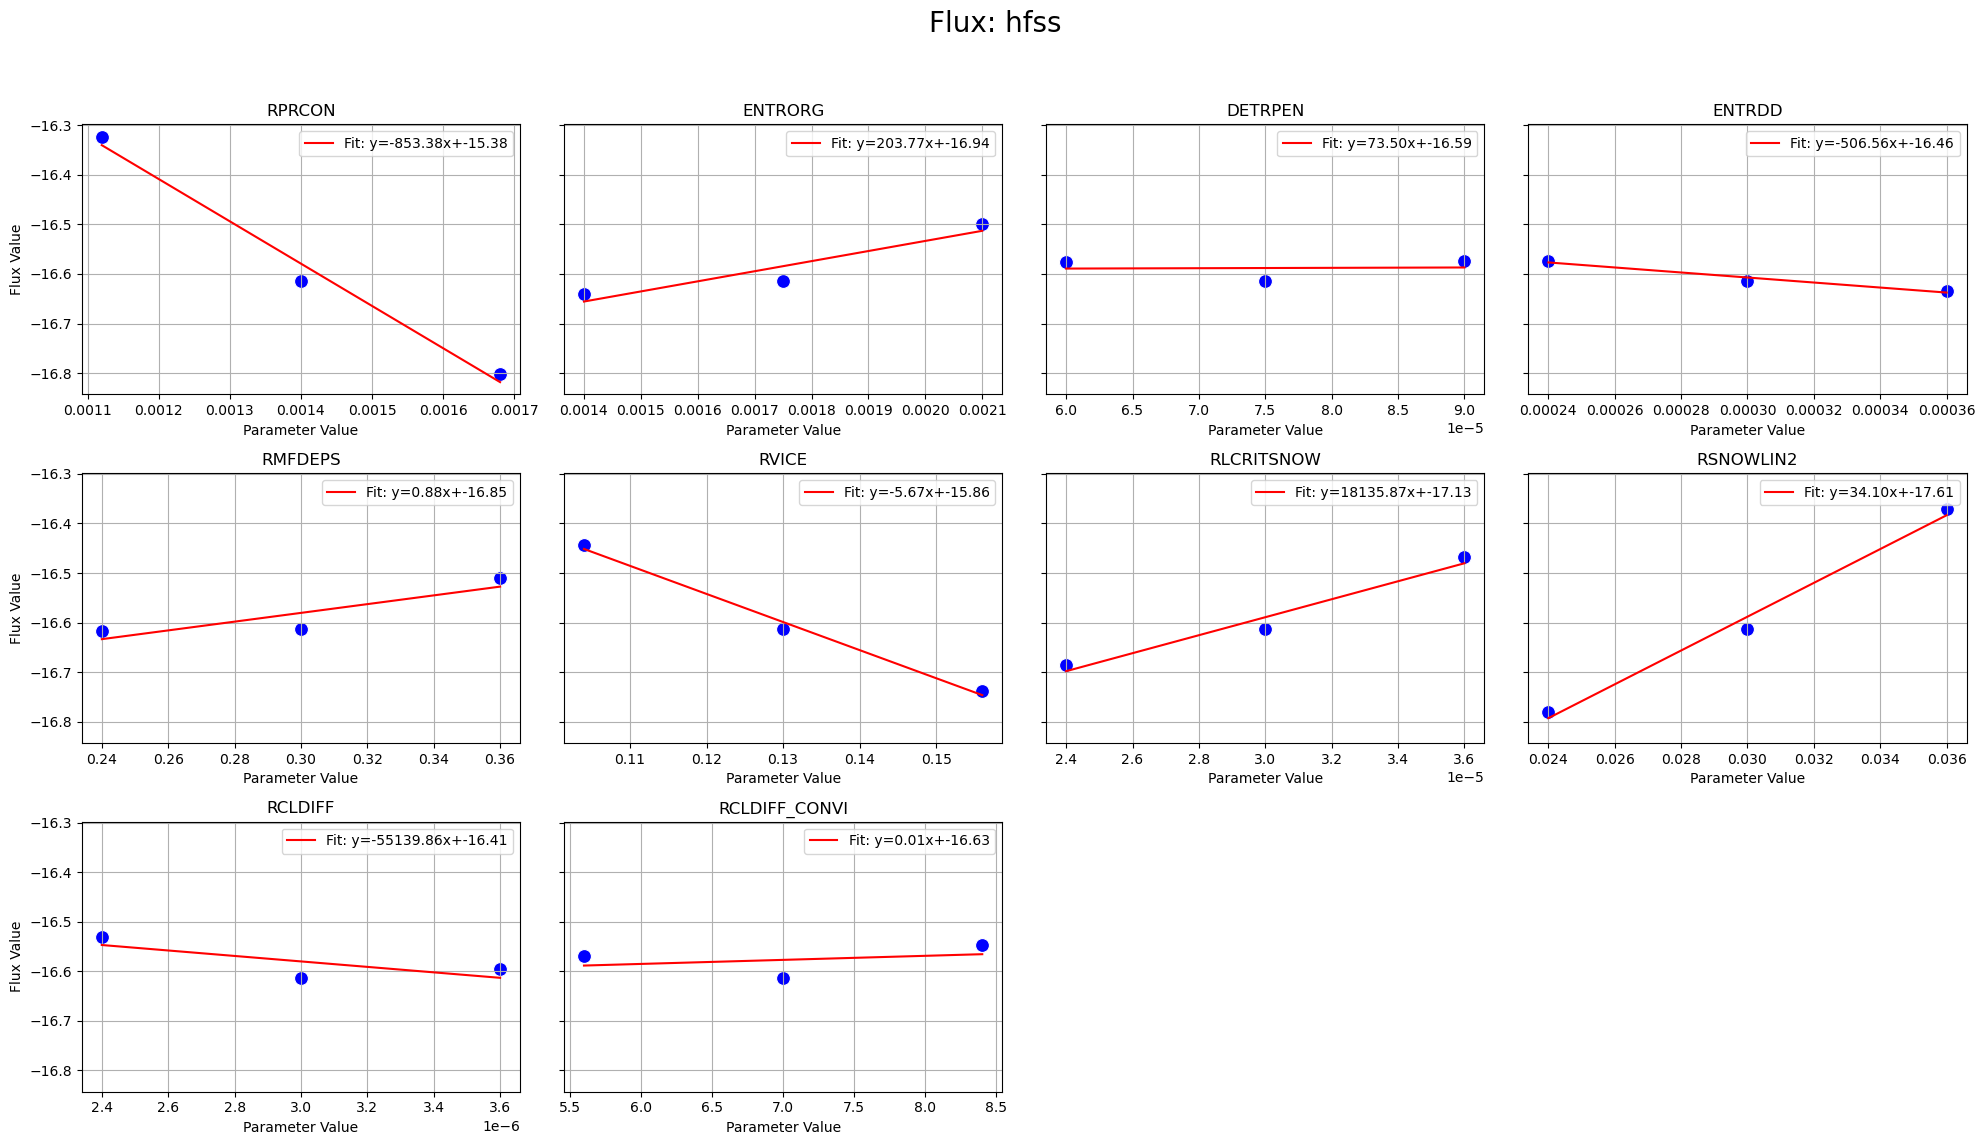

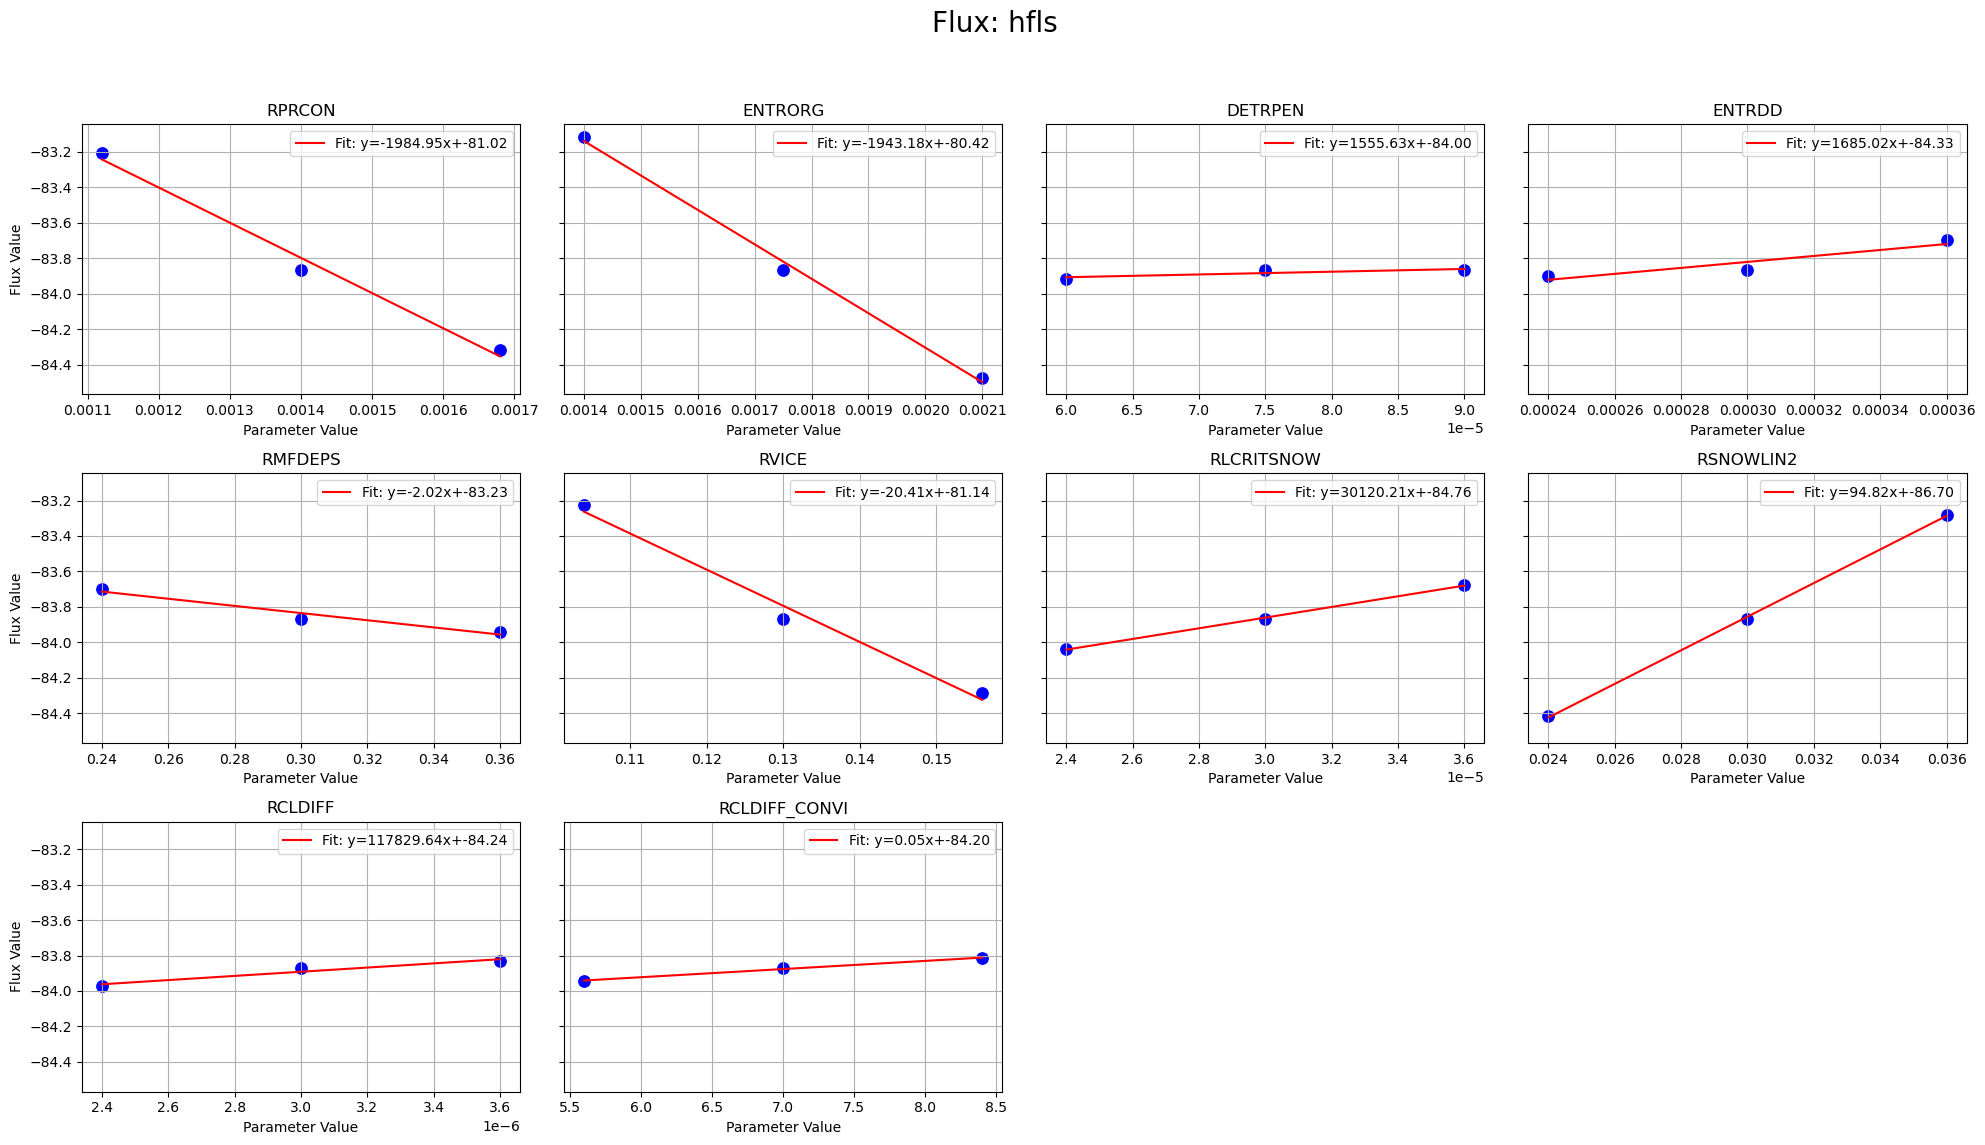

In [ ]:
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Directories
ecmean_dir = 'ecmean'
exps_dir = 'exps'


# Selected fluxes
selected_fluxes = ['net_toa', 'rlnt', 'rsnt', 'swcf', 'lwcf', 'hfss', 'hfls']

# Read parameter names from params_s000.yaml
params_file = os.path.join(exps_dir, 'params_s000.yaml')
with open(params_file, 'r') as file:
    params_data = yaml.safe_load(file)

parameter_names = [
    "RPRCON",
    "ENTRORG",
    "DETRPEN",
    "ENTRDD",
    "RMFDEPS",
    "RVICE",
    "RLCRITSNOW",
    "RSNOWLIN2",
    "RCLDIFF",
    "RCLDIFF_CONVI"
]
num_params = len(parameter_names)

# Initialize data dictionary
# data_dict[flux][param] = {'param_value': [], 'flux_value': []}
data_dict = {
    flux: {param: {'param_value': [], 'flux_value': []} for param in parameter_names}
    for flux in selected_fluxes
}

# Function to extract flux values from YAML
def extract_flux(filepath, fluxes):
    with open(filepath, 'r') as stream:
        try:
            content = yaml.safe_load(stream)
        except yaml.YAMLError:
            return {flux: np.nan for flux in fluxes}
    flux_values = {}
    for flux in fluxes:
        if flux in content and 'ALL' in content[flux]:
            flux_values[flux] = content[flux]['ALL'].get('Global', np.nan)
        else:
            flux_values[flux] = np.nan
    return flux_values


# Function to extract parameter value from params YAML
def extract_param(filepath, param):
    if not os.path.exists(filepath):
        return np.nan
    with open(filepath, 'r') as stream:
        try:
            content = yaml.safe_load(stream)
        except yaml.YAMLError:
            return np.nan
    return content.get(param, np.nan)

# Populate data dictionary
for idx, param in enumerate(parameter_names, start=0):
    # Reference experiment
    for exp in [f's0{idx}1', 's000', f's0{idx}2']:
        file = f'global_mean_{exp}_EC-Earth4_r1i1p1f1_1991_2001.yml'
        path = os.path.join(ecmean_dir, file)
        fluxes = extract_flux(path, selected_fluxes)
        params_file = os.path.join(exps_dir, f'params_{exp}.yaml')
        param_value = extract_param(params_file, param)
        
        for flux in selected_fluxes:
            data_dict[flux][param]['param_value'].append(param_value)
            data_dict[flux][param]['flux_value'].append(fluxes.get(flux, np.nan))


# Plotting
for flux in selected_fluxes:
    num_panels = num_params
    cols = 4
    rows = int(np.ceil(num_panels / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=False, sharey=True)
    axes = axes.flatten()
    
    for i, param in enumerate(parameter_names):
        ax = axes[i]
        param_vals = data_dict[flux][param]['param_value']
        flux_vals = data_dict[flux][param]['flux_value']
        
        # Remove NaN values
        valid = ~np.isnan(param_vals) & ~np.isnan(flux_vals)
        x = np.array(param_vals)[valid]
        y = np.array(flux_vals)[valid]
        
        if len(x) < 2:
            ax.scatter(x, y, color='blue', label='Data Points')
            ax.set_title(f'{param}')
            ax.set_xlabel('Parameter Value')
            ax.set_ylabel('Flux Value')
            ax.legend()
            ax.grid(True)
            continue
        
        # Scatter plot
        sns.scatterplot(x=x, y=y, ax=ax, s=100, color='blue', label=None)#label='Data Points')
        
        # Linear fit
        slope, intercept = np.polyfit(x, y, 1)
        fit_x = np.linspace(min(x), max(x), 100)
        fit_y = slope * fit_x + intercept
        ax.plot(fit_x, fit_y, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
        
        # Customize axes
        ax.set_title(f'{param}')
        ax.set_xlabel('Parameter Value')
        ax.set_ylabel('Flux Value')
        ax.legend()
        ax.grid(True)
    
    # Hide any unused subplots
    for j in range(num_panels, rows*cols):
        fig.delaxes(axes[j])
    
    plt.suptitle(f'Flux: {flux}', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
                # Save each figure
    fig.savefig(f'stamps_{flux}.png')

Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
Not found exps/params_h100.yml
{'param_value': [0.000896, 0.001008, nan, 0.001232, 0.001344], 'flux_value': [-2.9416797161102295, -2.541985273361206, -1.5479202270507812, -1.8655800819396973, -1.7138731479644775]}


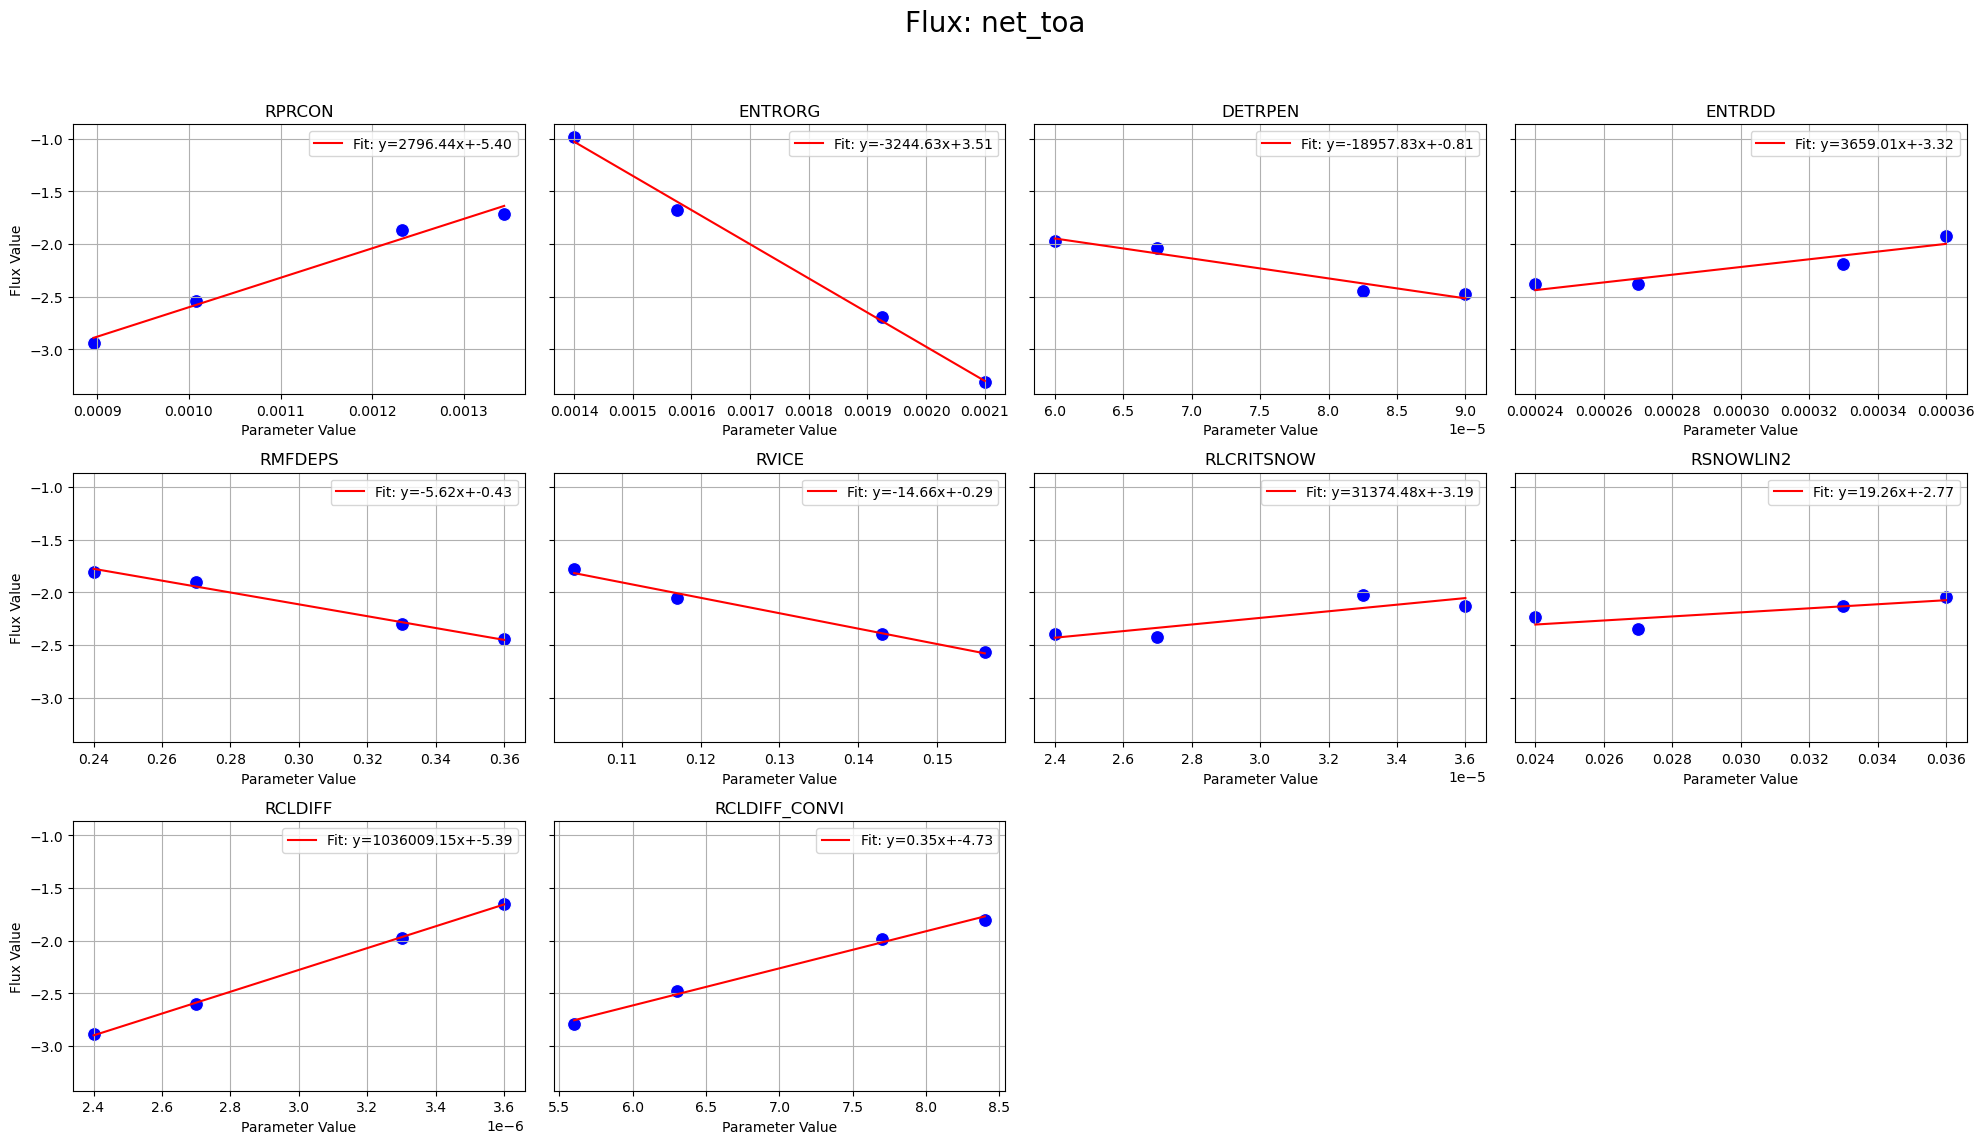

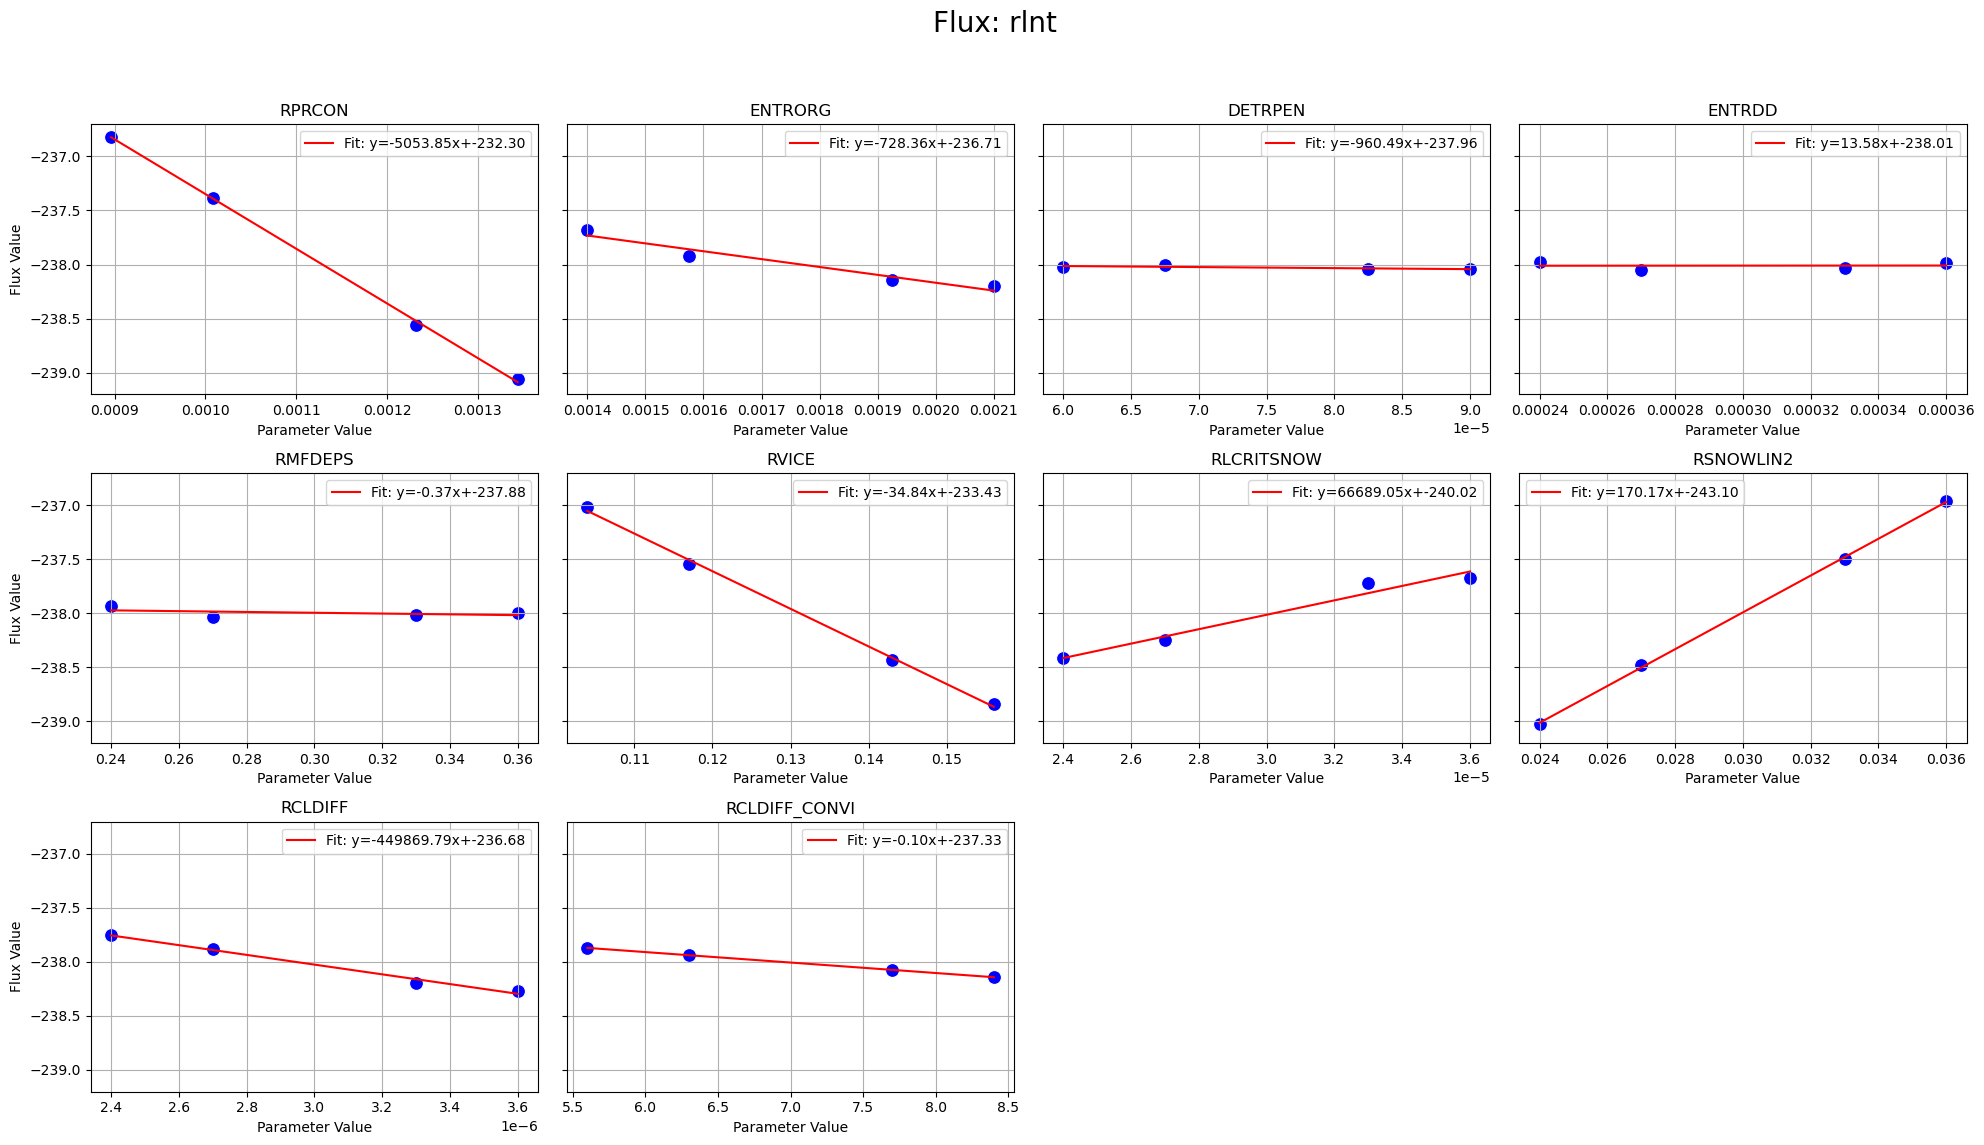

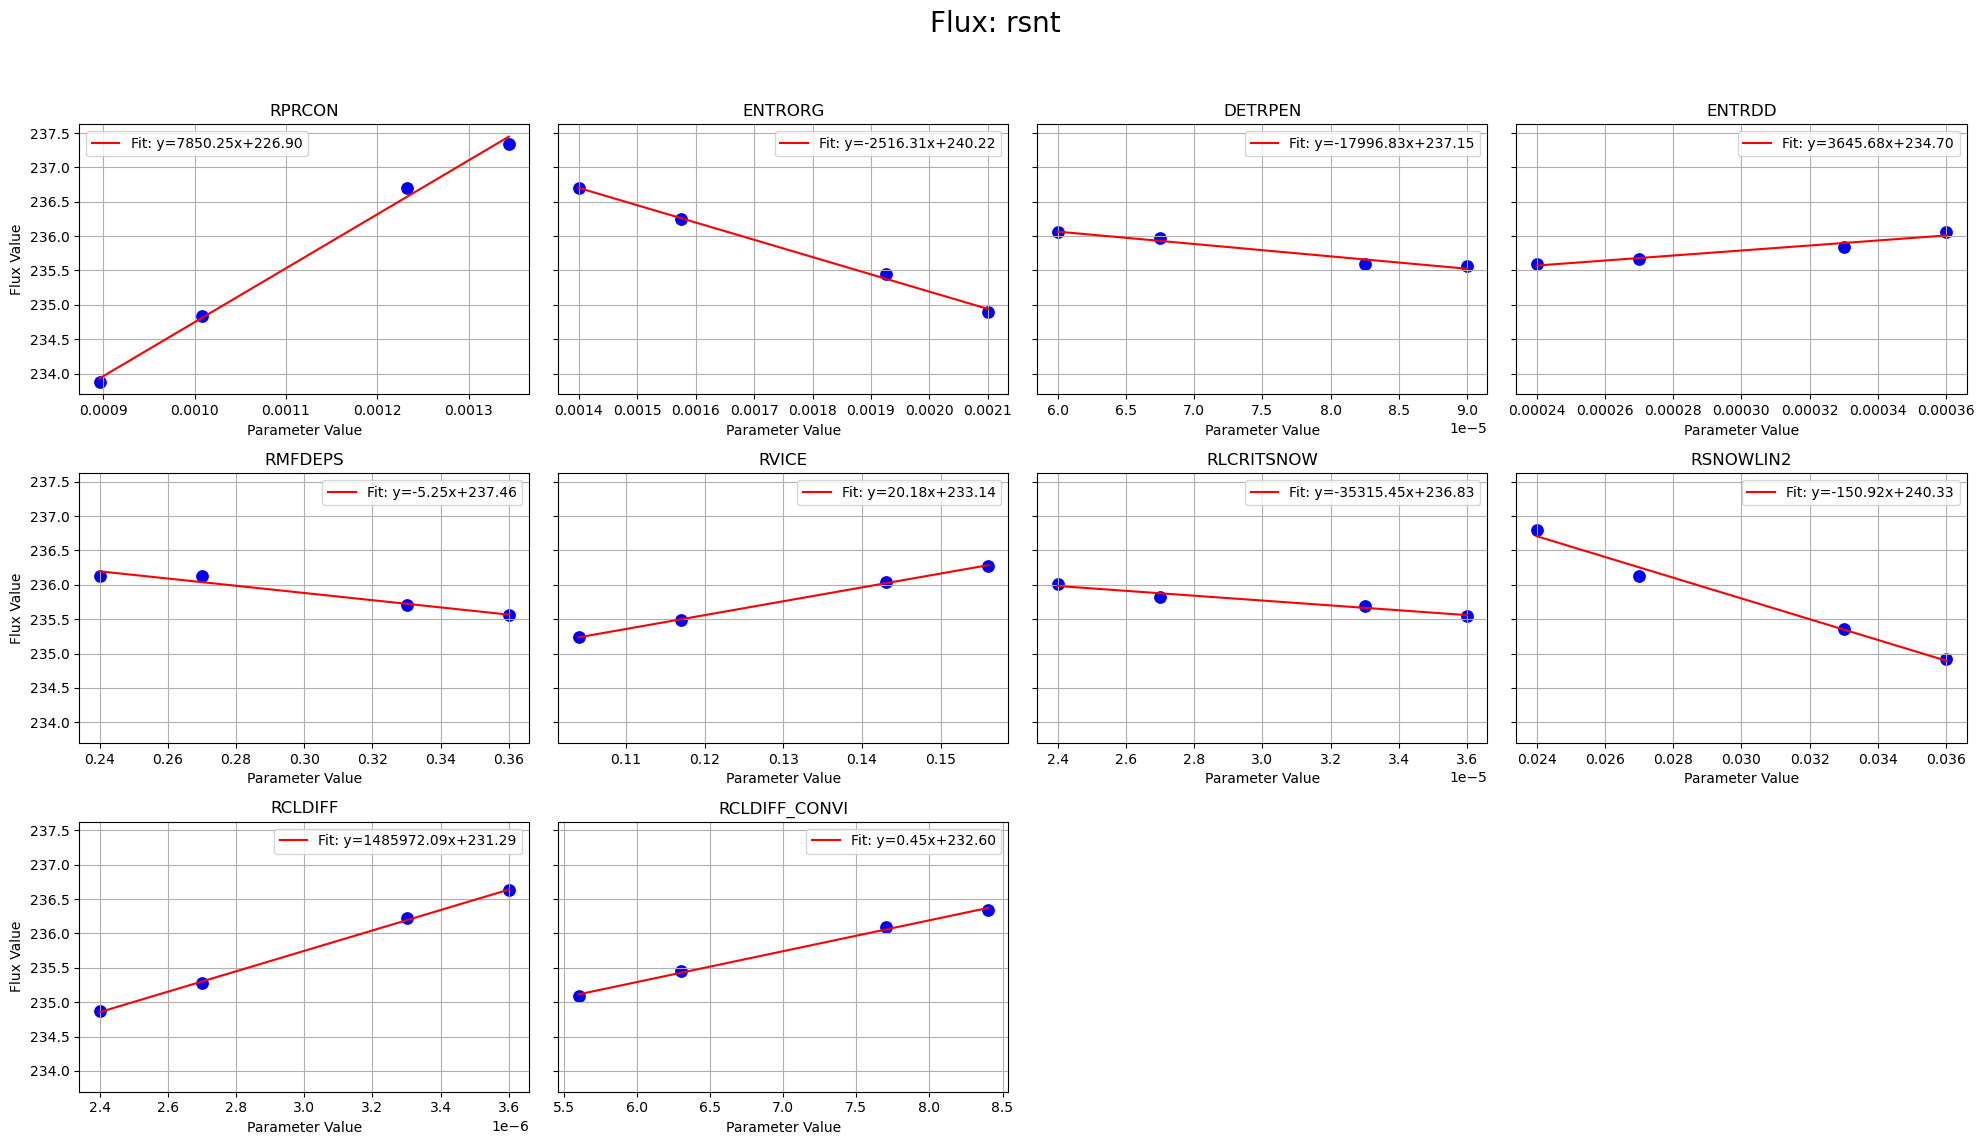

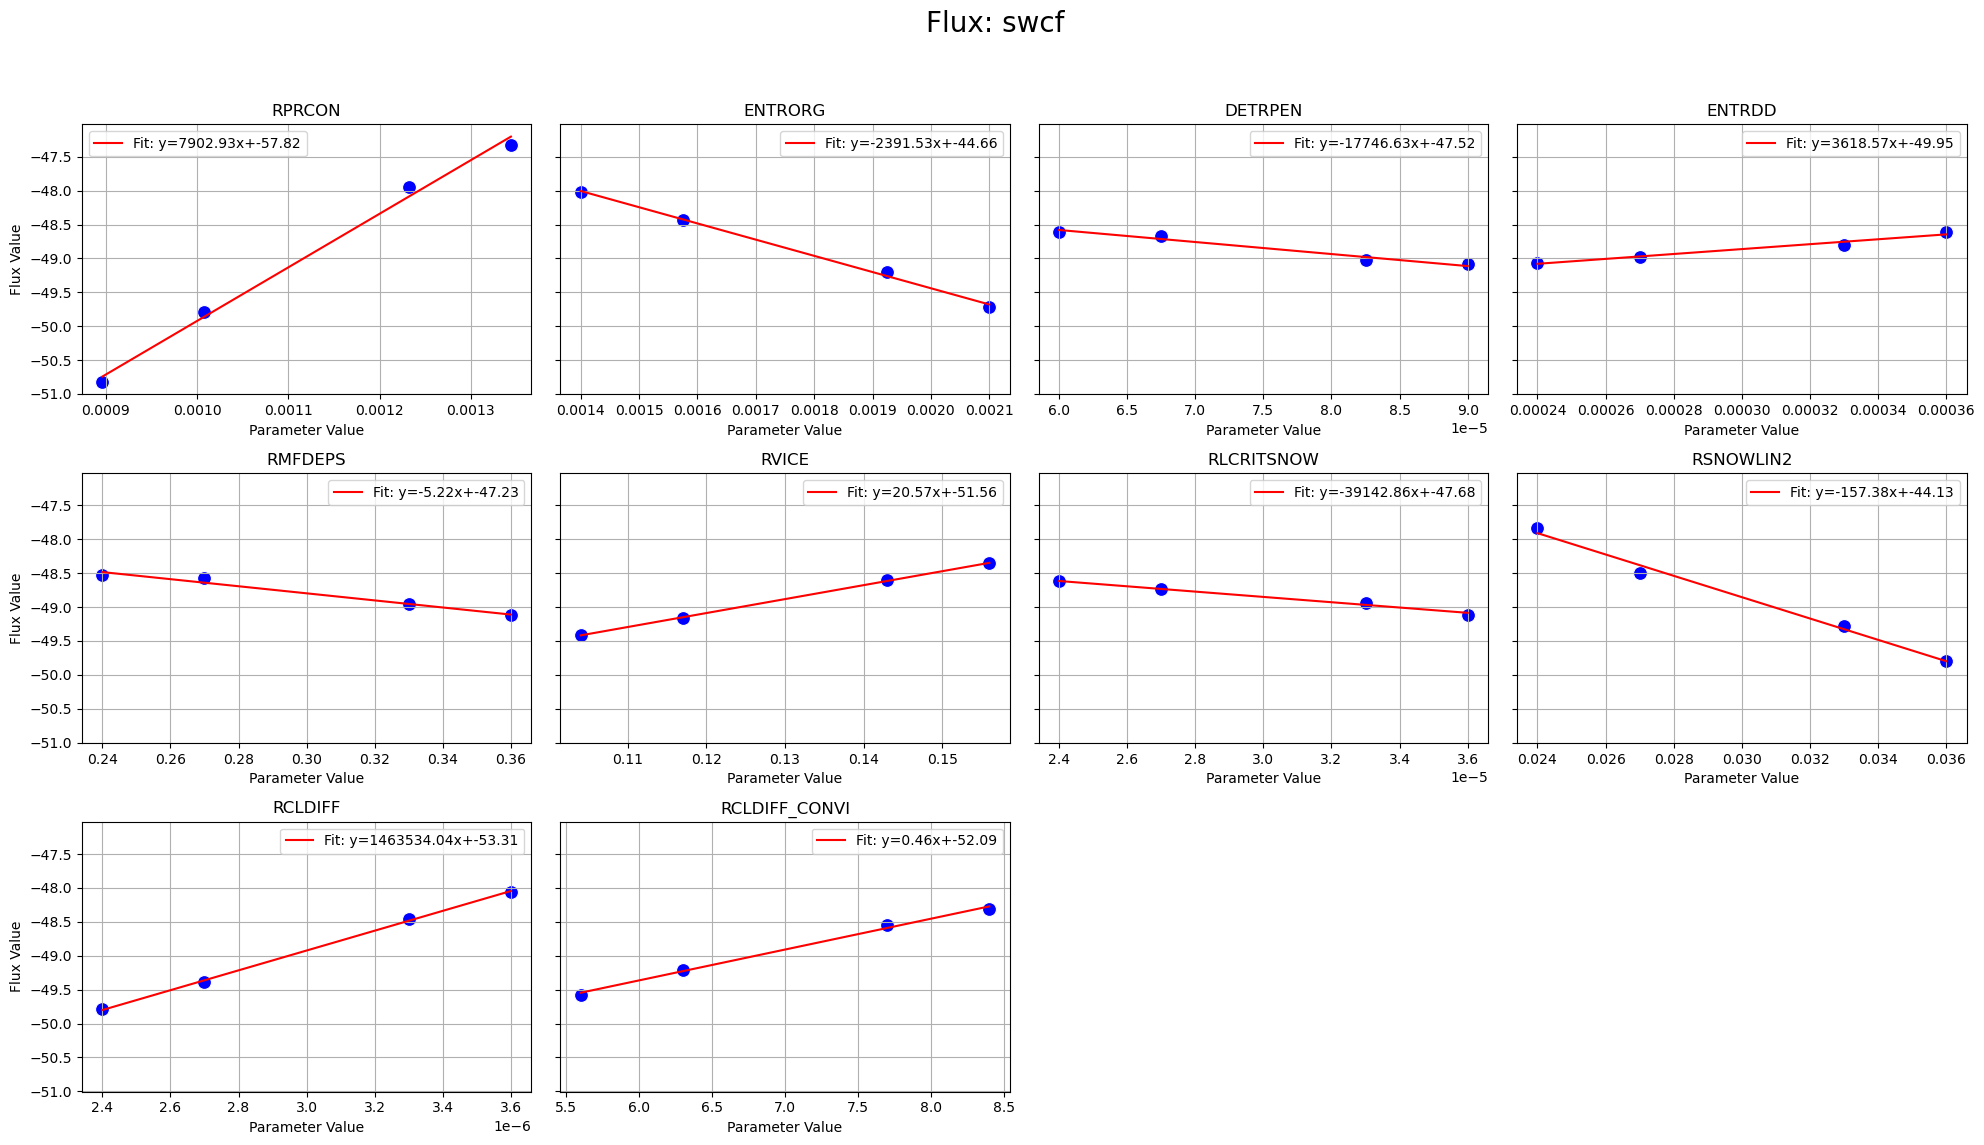

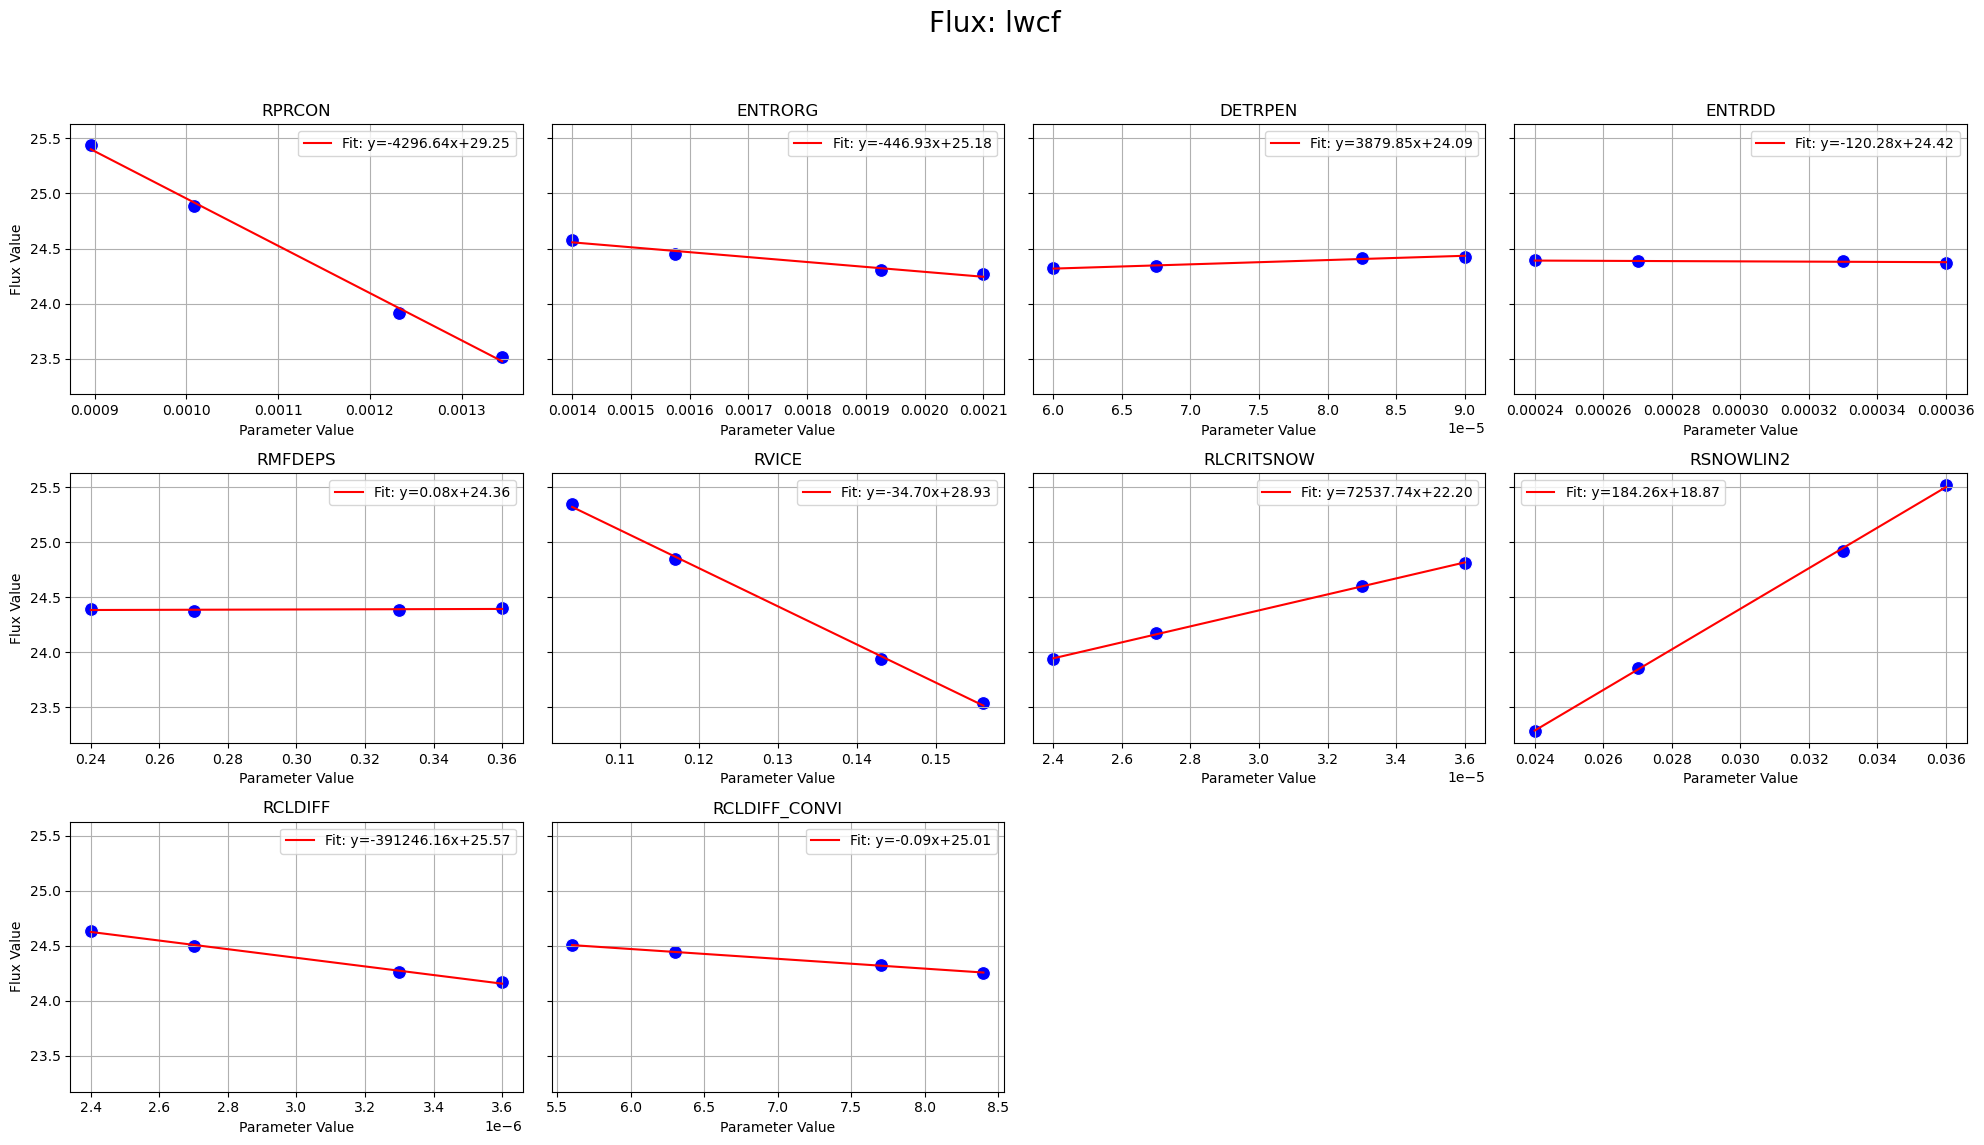

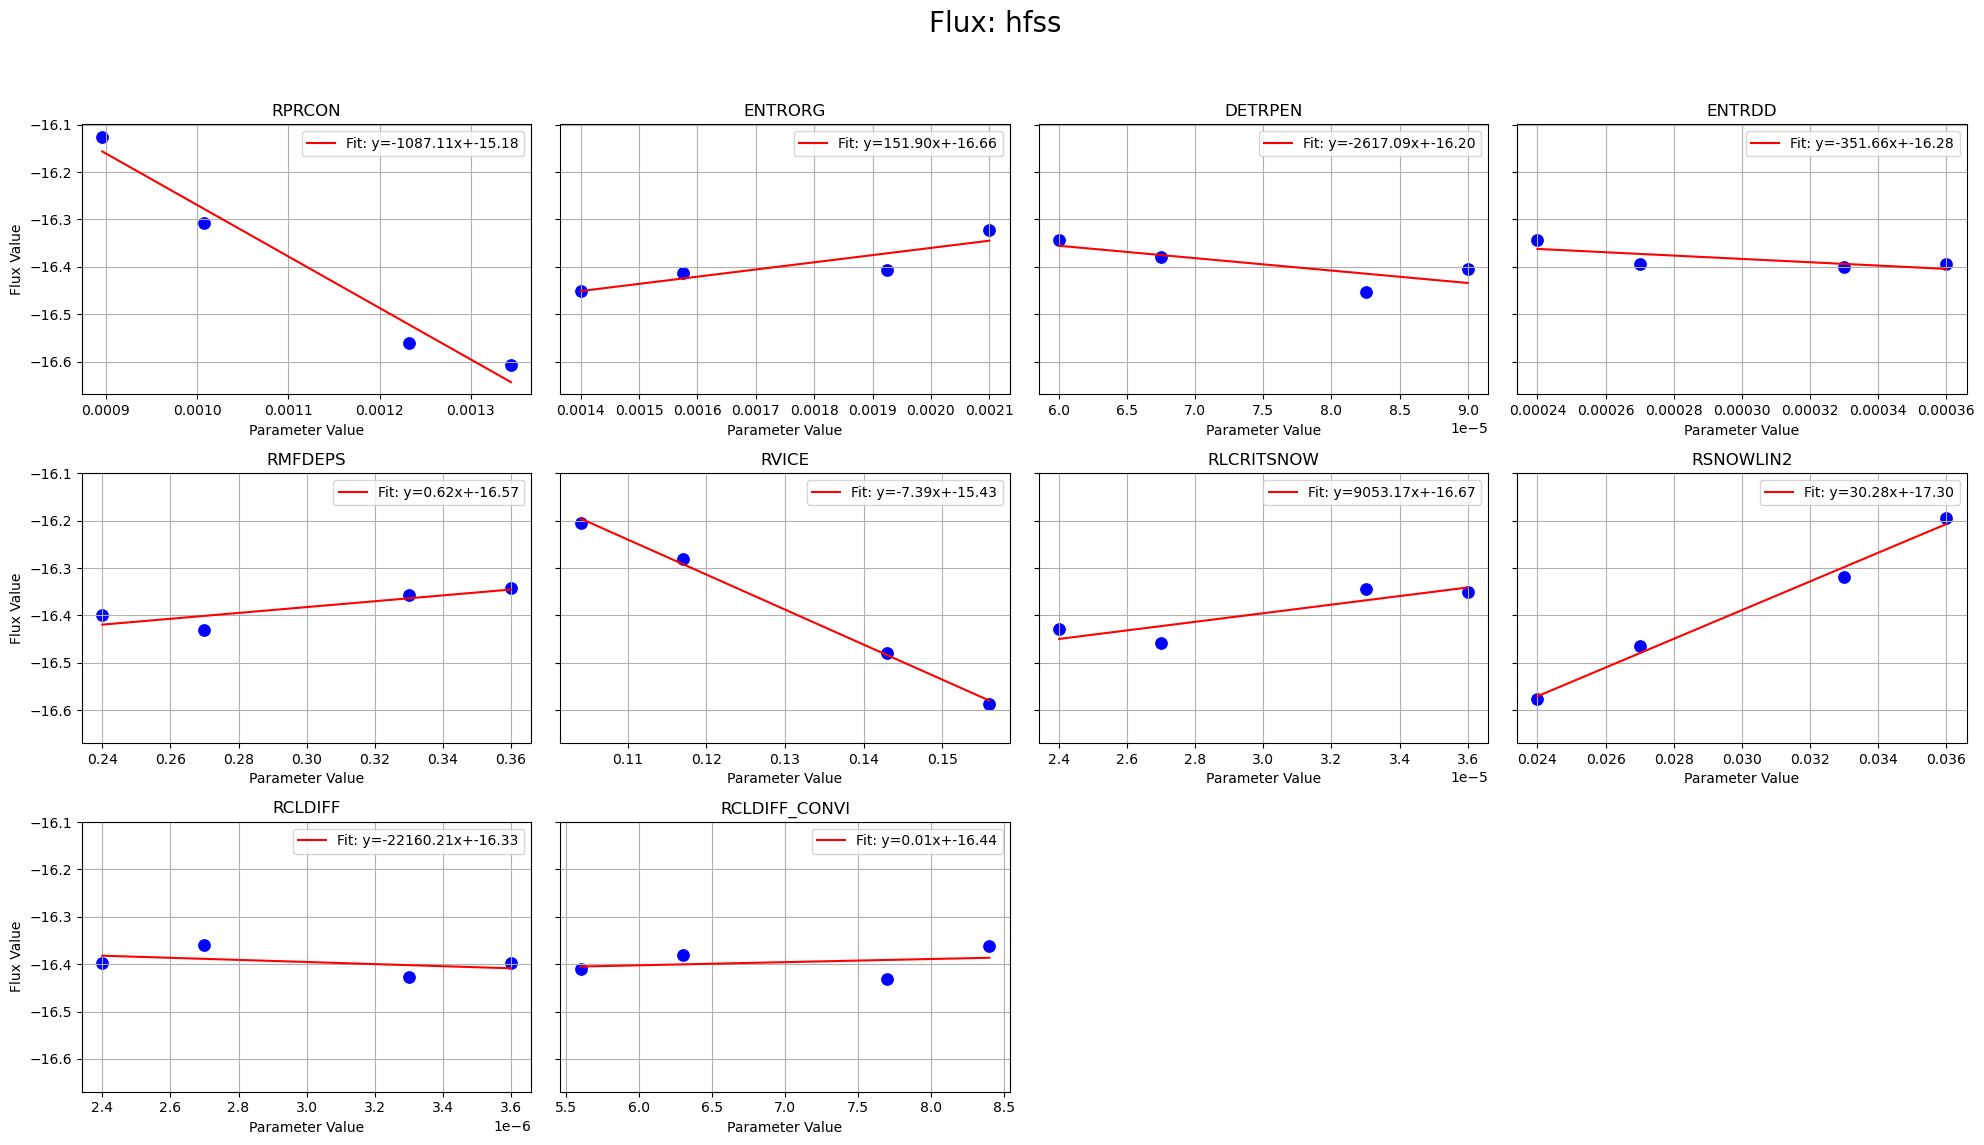

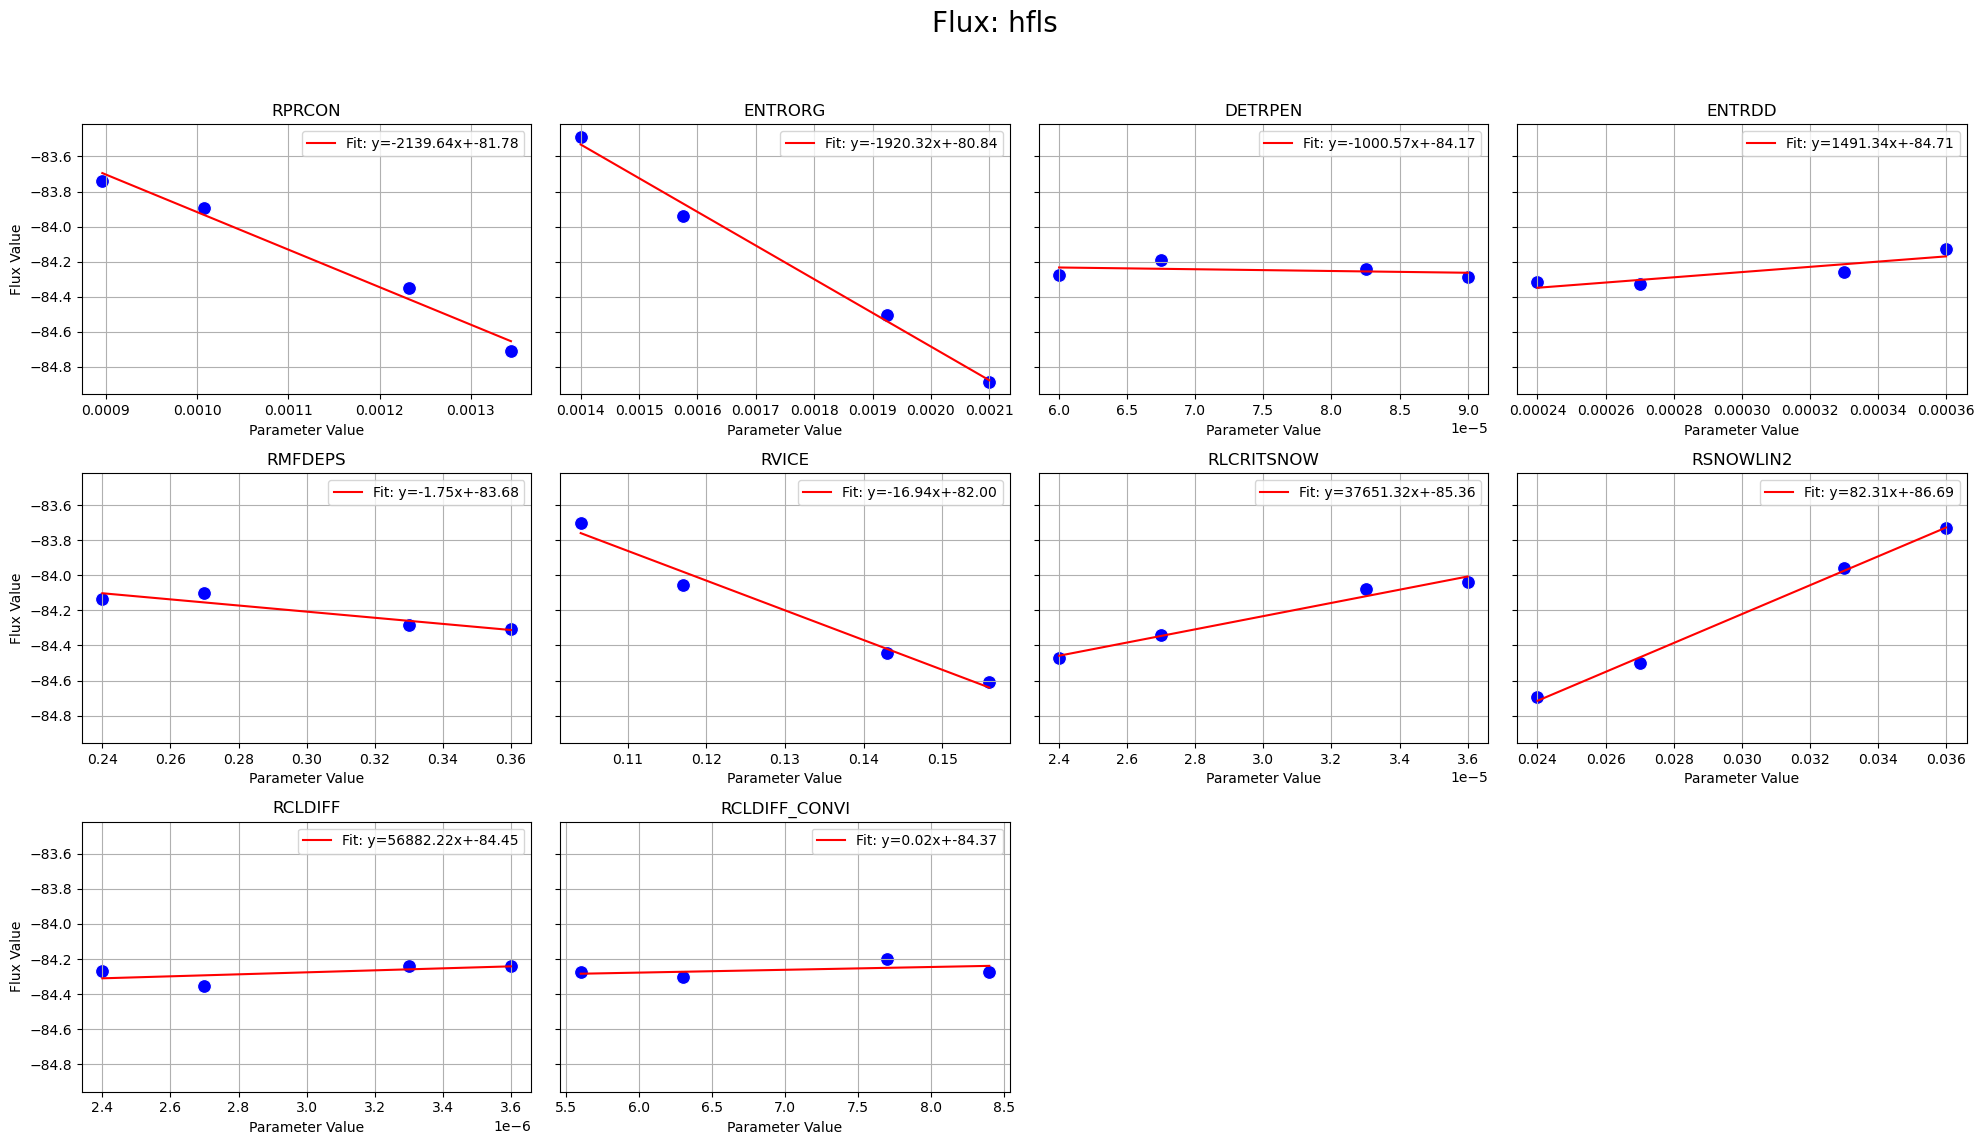

In [113]:
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Directories
ecmean_dir = 'ecmean'
exps_dir = 'exps'


# Selected fluxes
selected_fluxes = ['net_toa', 'rlnt', 'rsnt', 'swcf', 'lwcf', 'hfss', 'hfls']

# Read parameter names from params_s000.yaml
params_file = os.path.join(exps_dir, 'params_h100.yaml')
with open(params_file, 'r') as file:
    params_data = yaml.safe_load(file)

parameter_names = [
    "RPRCON",
    "ENTRORG",
    "DETRPEN",
    "ENTRDD",
    "RMFDEPS",
    "RVICE",
    "RLCRITSNOW",
    "RSNOWLIN2",
    "RCLDIFF",
    "RCLDIFF_CONVI"
]
num_params = len(parameter_names)

# Initialize data dictionary
# data_dict[flux][param] = {'param_value': [], 'flux_value': []}
data_dict = {
    flux: {param: {'param_value': [], 'flux_value': []} for param in parameter_names}
    for flux in selected_fluxes
}

# Function to extract flux values from YAML
def extract_flux(filepath, fluxes):
    with open(filepath, 'r') as stream:
        try:
            content = yaml.safe_load(stream)
        except yaml.YAMLError:
            return {flux: np.nan for flux in fluxes}
    flux_values = {}
    for flux in fluxes:
        if flux in content and 'ALL' in content[flux]:
            flux_values[flux] = content[flux]['ALL'].get('Global', np.nan)
        else:
            flux_values[flux] = np.nan
    return flux_values


# Function to extract parameter value from params YAML
def extract_param(filepath, param):
    if not os.path.exists(filepath):
        print("Not found", filepath)
        return np.nan
    with open(filepath, 'r') as stream:
        try:
            content = yaml.safe_load(stream)
        except yaml.YAMLError:
            return np.nan
    return content.get(param, np.nan)

# Populate data dictionary
for idx, param in enumerate(parameter_names, start=0):
    # Reference experiment
    for exp in [f'h1{idx}1', f'h1{idx}3', 'h100',  f'h1{idx}4', f'h1{idx}2']:
        file = f'global_mean_{exp}_EC-Earth4_r1i1p1f1_1991_2001.yml'
        path = os.path.join(ecmean_dir, file)
        fluxes = extract_flux(path, selected_fluxes)
        params_file = os.path.join(exps_dir, f'params_{exp}.yml')
        param_value = extract_param(params_file, param)
        
        for flux in selected_fluxes:
            data_dict[flux][param]['param_value'].append(param_value)
            data_dict[flux][param]['flux_value'].append(fluxes.get(flux, np.nan))

print(data_dict['net_toa']['RPRCON'])
# Plotting
for flux in selected_fluxes:
    num_panels = num_params
    cols = 4
    rows = int(np.ceil(num_panels / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=False, sharey=True)
    axes = axes.flatten()
    
    for i, param in enumerate(parameter_names):
        ax = axes[i]
        param_vals = data_dict[flux][param]['param_value']
        flux_vals = data_dict[flux][param]['flux_value']
        
        # Remove NaN values
        valid = ~np.isnan(param_vals) & ~np.isnan(flux_vals)
        x = np.array(param_vals)[valid]
        y = np.array(flux_vals)[valid]
        
        if len(x) < 2:
            ax.scatter(x, y, color='blue', label='Data Points')
            ax.set_title(f'{param}')
            ax.set_xlabel('Parameter Value')
            ax.set_ylabel('Flux Value')
            ax.legend()
            ax.grid(True)
            continue
        
        # Scatter plot
        sns.scatterplot(x=x, y=y, ax=ax, s=100, color='blue', label=None)#label='Data Points')
        
        # Linear fit
        slope, intercept = np.polyfit(x, y, 1)
        fit_x = np.linspace(min(x), max(x), 100)
        fit_y = slope * fit_x + intercept
        ax.plot(fit_x, fit_y, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
        
        # Customize axes
        ax.set_title(f'{param}')
        ax.set_xlabel('Parameter Value')
        ax.set_ylabel('Flux Value')
        ax.legend()
        ax.grid(True)
    
    # Hide any unused subplots
    for j in range(num_panels, rows*cols):
        fig.delaxes(axes[j])
    
    plt.suptitle(f'Flux: {flux}', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
                # Save each figure
    fig.savefig(f'stamps_{flux}.png')

In [65]:
from matplotlib.colors import ListedColormap

def read_cpt(filename):
  """Reads a CPT file and returns a ListedColormap."""
  with open(filename, 'r') as f:
    lines = f.readlines()

  # Extract color values (assuming RGB)
  colors = []
  for line in lines:
    if line.startswith('#') or line.startswith('B') or line.startswith('F') or line.startswith('N'):
      continue  # Skip comment lines
    try:
      r, g, b = map(float, line.split()[0:3])
      colors.append((r / 255, g / 255, b / 255))
    except ValueError:
      continue  # Skip lines that don't contain color data

  return ListedColormap(colors)

cmap = read_cpt("WhiteBlueGreenYellowRed.cpt")

In [100]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os

def read_cpt(filename):
    """Read a CPT file and return data values and corresponding RGB colors."""
    data = []
    with open(filename, 'r') as file:
        for line in file:
            # Skip comments and empty lines
            if line.startswith('#') or not line.strip():
                continue
            parts = line.strip().split()
            if len(parts) < 4:
                continue
            try:
                # Parse data value and RGB
                value = float(parts[0])
                r = int(parts[1]) / 255.0
                g = int(parts[2]) / 255.0
                b = int(parts[3]) / 255.0
                data.append((value, (r, g, b)))
            except ValueError:
                # Handle special cases or additional parameters if needed
                continue
    # Sort data based on data values
    data.sort(key=lambda x: x[0])
    values, colors = zip(*data)
    values = np.array(values)
    colors = np.array(colors)

    # Normalize the data values between 0 and 1
    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list(os.path.basename(filename).removesuffix(".cpt"), list(zip(norm(values), colors)))
    return cmap


In [101]:
cmap= read_cpt('cpt/WhiteBlueGreenYellowRed.cpt')


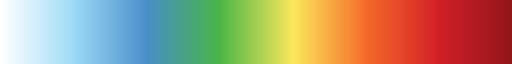

In [102]:
cmap

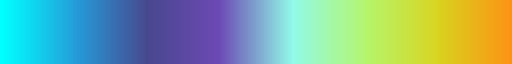

In [71]:
cmap

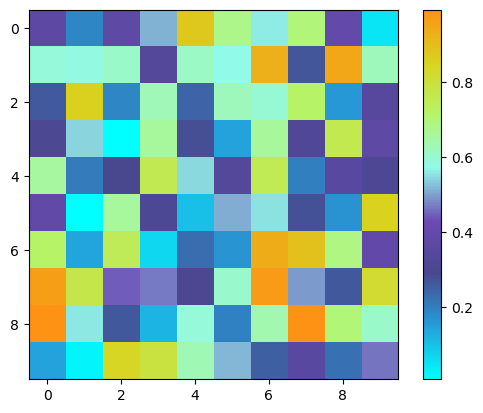

In [69]:
data = np.random.rand(10, 10)
plt.imshow(data, cmap=cmap)
plt.colorbar()
plt.show()

cmap = cmocean.tools.cmap('./WhiteBlueGreenYellowRed.cpt')

#

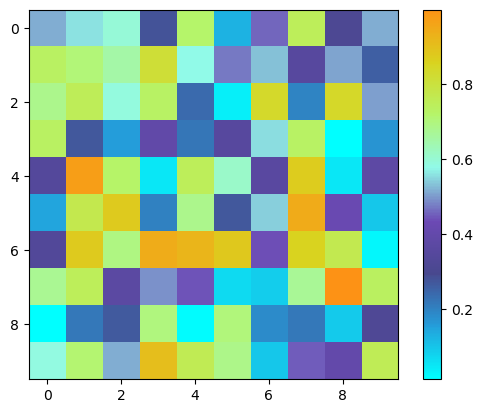

In [70]:
import numpy as np
data = np.random.rand(10, 10)
plt.imshow(data, cmap=cmap)
plt.colorbar()
plt.show()